Problem 1
The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location.  Aggregate these login counts based on 15-minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand.  Please report/illustrate important features of the demand, such as daily cycles.  If there are data quality issues, please report them.   

In [170]:
import json

from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline  

In [3]:
with open('logins (3).json') as data_file:    
    data = json.load(data_file)

In [4]:
data.keys()

[u'login_time']

In [6]:
login_time = data['login_time']

In [51]:
login_df = pd.DataFrame([datetime.strptime(x,'%Y-%m-%d %H:%M:%S') for x in login_time],columns=['login_time'])

In [52]:
login_df.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


#### The simulated data is from 1970-01-01 to 1970-04-13

In [53]:
login_df.set_index('login_time', inplace = True)
login_df['count'] = 1

In [54]:
login_ts = login_df.resample('15T', how = sum)

In [122]:
#login_ts['dayofweek']  = map(lambda x: x.strftime("%a"),login_ts.index)
login_ts['dayofweek'] =login_ts.index.dayofweek
login_ts['hour'] = login_ts.index.hour
login_ts['dayofyear'] = login_ts.index.dayofyear

In [60]:
login_ts.fillna(0,inplace=True)

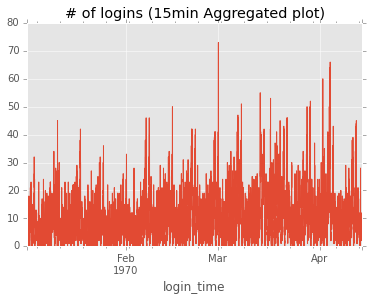

In [193]:
login_ts['count'].plot();
plt.title('# of logins (15min Aggregated plot)');

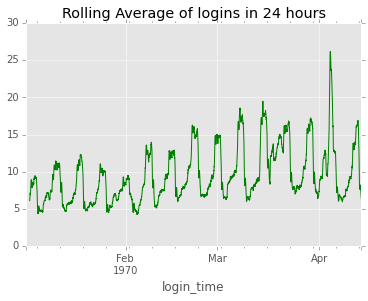

In [199]:
pd.rolling_mean(login_ts['count'], window=96).plot(style='-g');
plt.title('Rolling Average of logins in 24 hours');

### From the plot above, there seems to be a upper trend for # of logins, and strong cyclical pattern in # of logins

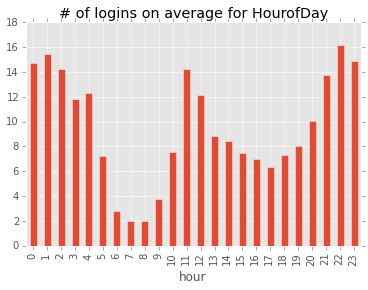

In [201]:
login_ts.groupby('hour')['count'].mean().plot(kind='bar');
plt.title('# of logins on average for HourofDay');

### From the plot above, we could see that, logins is increasing from 7 am to 11 am, and hits the day time high at 11 am, then there is another peak time starts from 20 pm and lasts untill 4 am. 

In [121]:
dayofweek = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

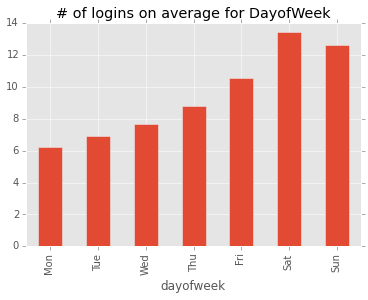

In [202]:
login_ts.groupby('dayofweek')['count'].mean().plot(kind='bar')
plt.xticks(range(7),dayofweek);
plt.title('# of logins on average for DayofWeek');

### From plot above, we could see that # of logins increase from Monday to Saturday, and Sunday's num is close to Saturdays

In [179]:
daily_pivoted = pd.pivot_table(login_ts, index=['hour'], columns=['dayofyear'], values=['count'])

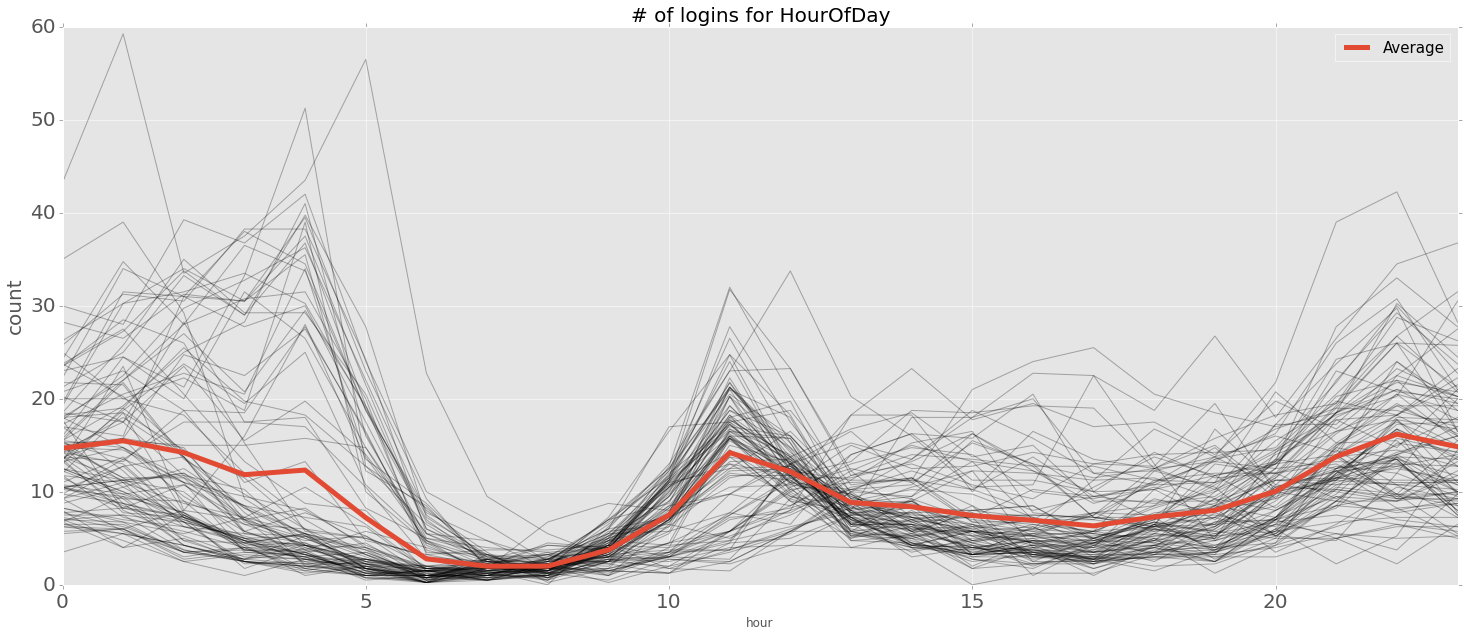

In [180]:
plt.figure(figsize=(25,10))
plt.plot(daily_pivoted,'k-', alpha=0.3, label='_nolegend_')
login_ts.groupby('hour')['count'].mean().plot(linewidth=5,label='Average')
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
plt.ylabel('count',size=20);
plt.legend(fontsize=15);
plt.title('# of logins for HourOfDay',size=20);

### We plot daily HourofDay count above to check the daily variance, the interetsing finding is that, for late night hours, the # of logins varies quite much, which indicates that maybe there is also DayofWeek effect for HourofDay

In [183]:
daily_pivoted = pd.pivot_table(login_ts, index=['hour'], columns=['dayofweek'], values=['count'])

In [184]:
daily_pivoted.columns = dayofweek

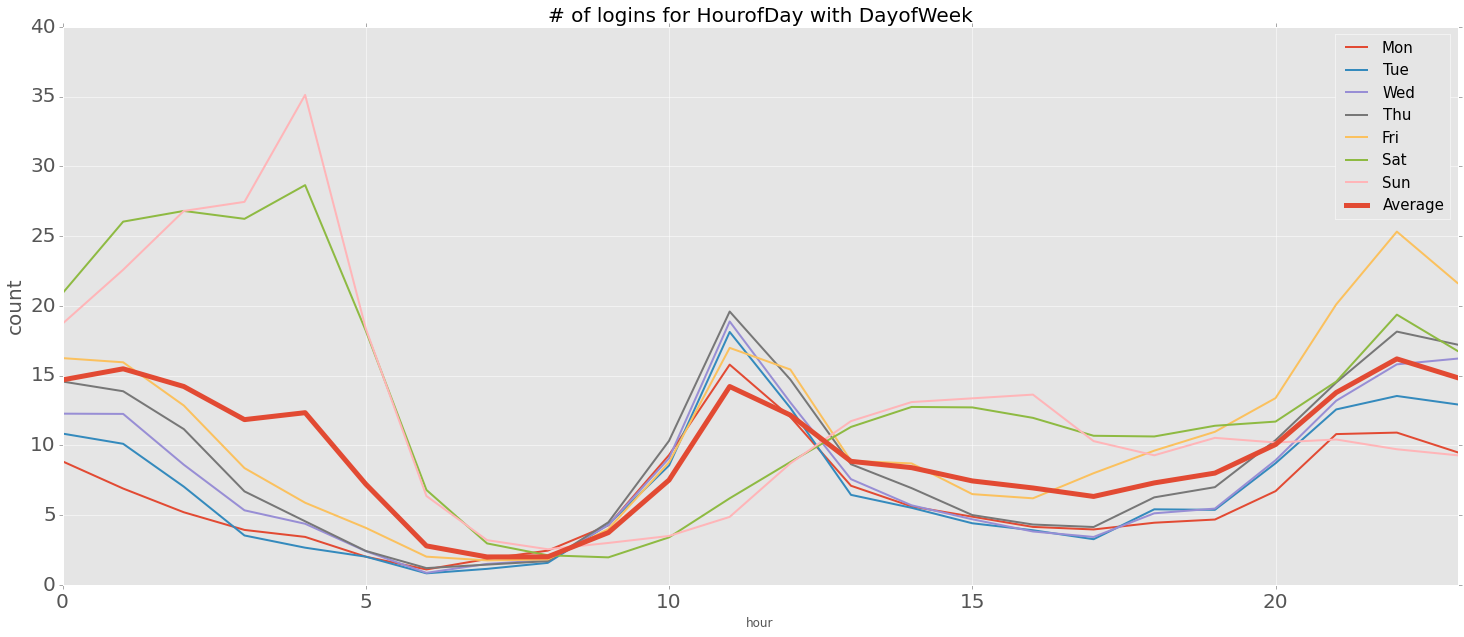

In [185]:
daily_pivoted.plot(figsize=(25,10),linewidth=2)
login_ts.groupby('hour')['count'].mean().plot(linewidth=5,label='Average')
#plt.xlabel();
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
plt.ylabel('count',size=20);
plt.legend(fontsize=15);
plt.title('# of logins for HourofDay with DayofWeek',size=20);

### From the plot above, 
#### 1. We observe peak hours for Friday and Saturday nights, Saturday and Sunday early mornings before 6 am, seems the simulated data conforms with reality that people go out more often on Friday and Saturday night
#### 2. We observe peak hours around weekday 11 am but descrease during weekends, it could be that people need to go out and have lunch
#### 3. We observe that Weekends and Weekdays behave quite differently